In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Muat dataset
url = ('/content/GermanCredit.csv')
df = pd.read_csv(url, delimiter=",")

In [ ]:
# Tampilkan 5 baris pertama dari dataset
print(df.head())

# Informasi umum tentang dataset
print(df.info())

# Statistik deskriptif
print(df.describe())

# Mengecek missing values
print(df.isnull().sum())

                status  duration                            credit_history  \
0         ... < 100 DM         6   critical account/other credits existing   
1    0 <= ... < 200 DM        48  existing credits paid back duly till now   
2  no checking account        12   critical account/other credits existing   
3         ... < 100 DM        42  existing credits paid back duly till now   
4         ... < 100 DM        24           delay in paying off in the past   

               purpose  amount                     savings  \
0  domestic appliances    1169  unknown/no savings account   
1  domestic appliances    5951                ... < 100 DM   
2           retraining    2096                ... < 100 DM   
3     radio/television    7882                ... < 100 DM   
4            car (new)    4870                ... < 100 DM   

  employment_duration  installment_rate                  personal_status_sex  \
0      ... >= 7 years                 4                        male : single  

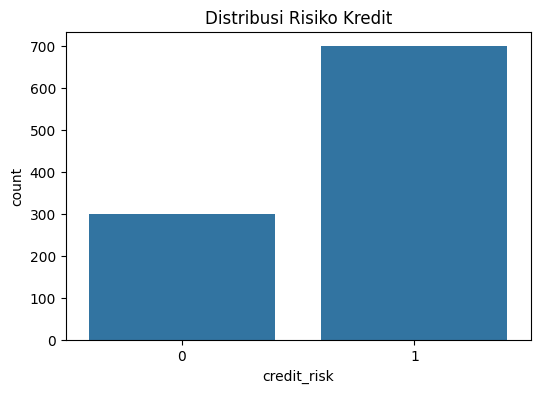

In [ ]:
# Distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(x='credit_risk', data=df)
plt.title('Distribusi Risiko Kredit')
plt.show()

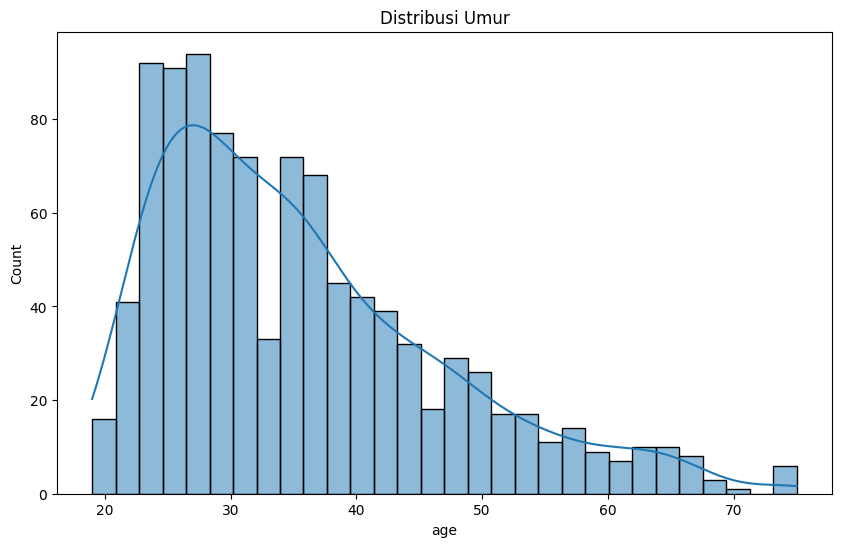

In [ ]:
# Distribusi umur
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Umur')
plt.show()

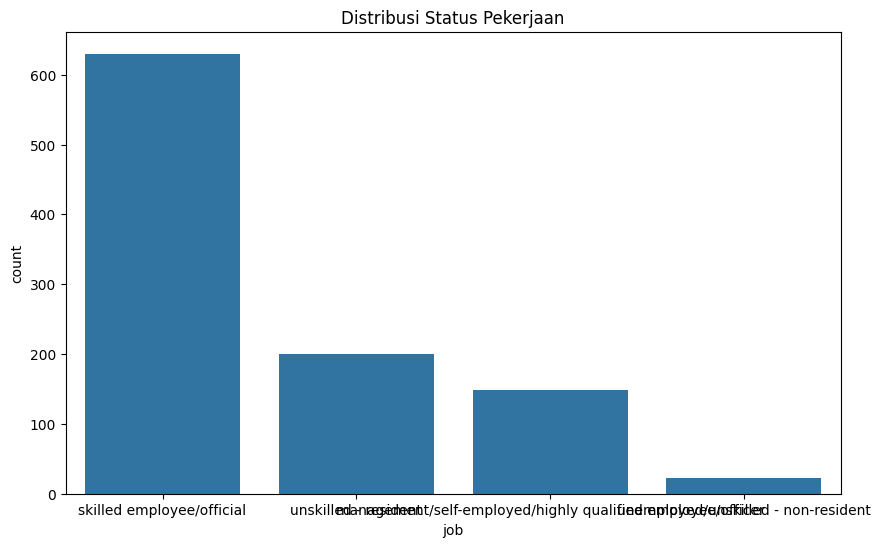

In [ ]:
# Distribusi Status Pekerjaan
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df)
plt.title('Distribusi Status Pekerjaan')
plt.show()

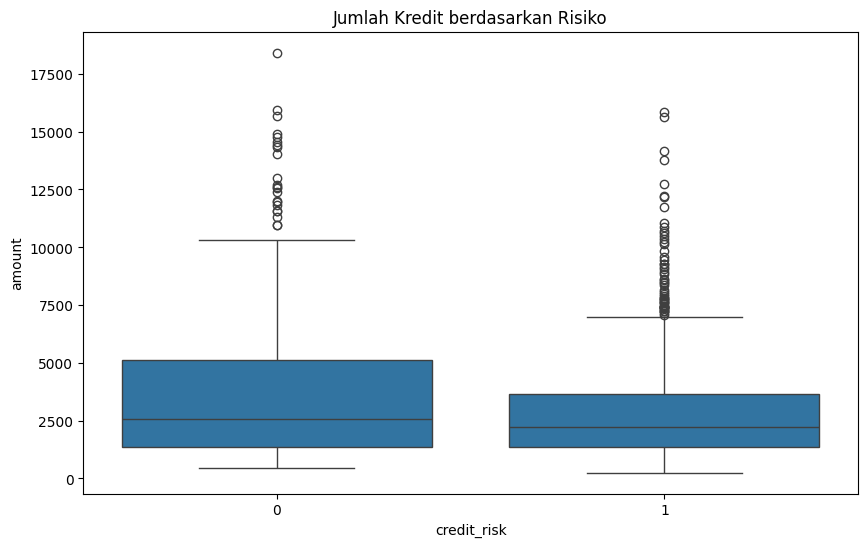

In [ ]:
# Boxplot jumlah kredit berdasarkan risiko
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_risk', y='amount', data=df)
plt.title('Jumlah Kredit berdasarkan Risiko')
plt.show()

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate            int64
personal_status_sex        object
other_debtors              object
present_residence           int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits              int64
job                        object
people_liable               int64
telephone                  object
foreign_worker             object
credit_risk                 int64
dtype: object
Kolom non-numerik: Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')


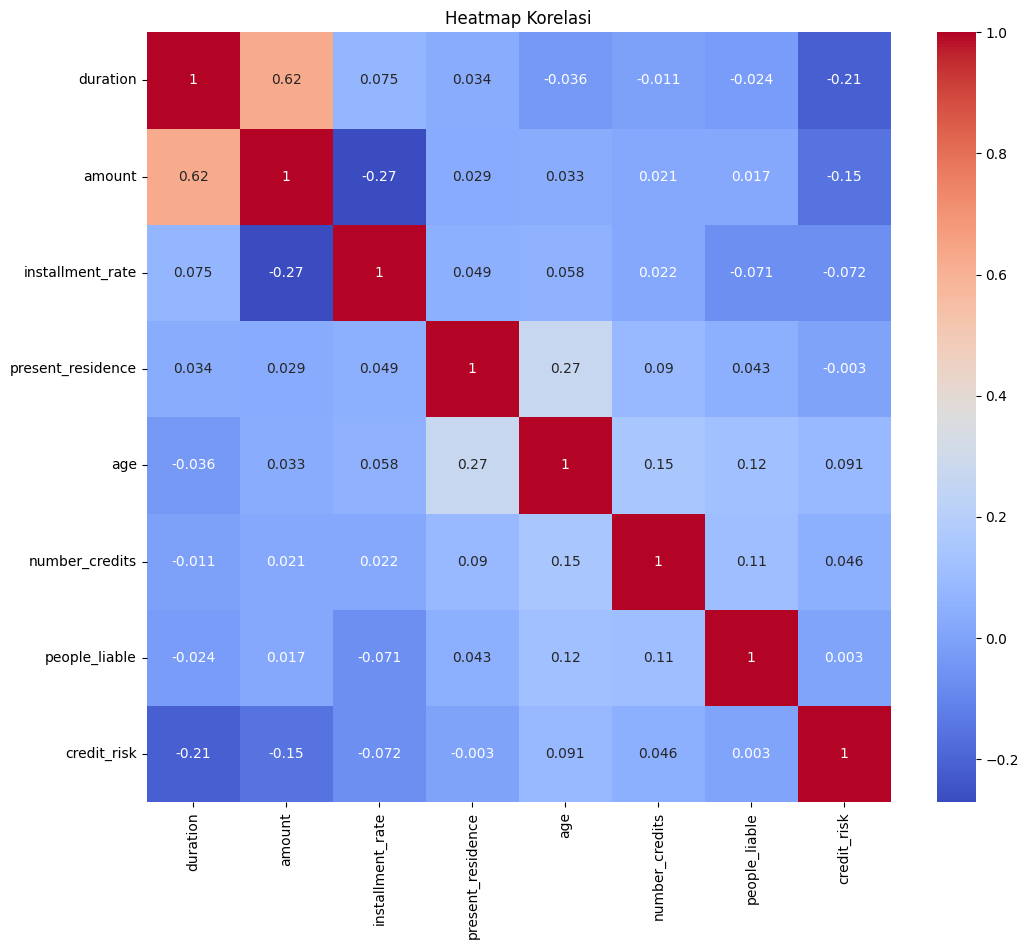

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Periksa tipe data dari setiap kolom
print(df.dtypes)

# Identifikasi kolom yang tidak numerik
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Kolom non-numerik:", non_numeric_columns)

# Opsi 1: Menghapus kolom non-numerik
df_numeric = df.drop(columns=non_numeric_columns)

# Opsi 2: Mengonversi kolom non-numerik jika memungkinkan
# df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Menghitung korelasi pada DataFrame yang sudah dibersihkan
correlation_matrix = df_numeric.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


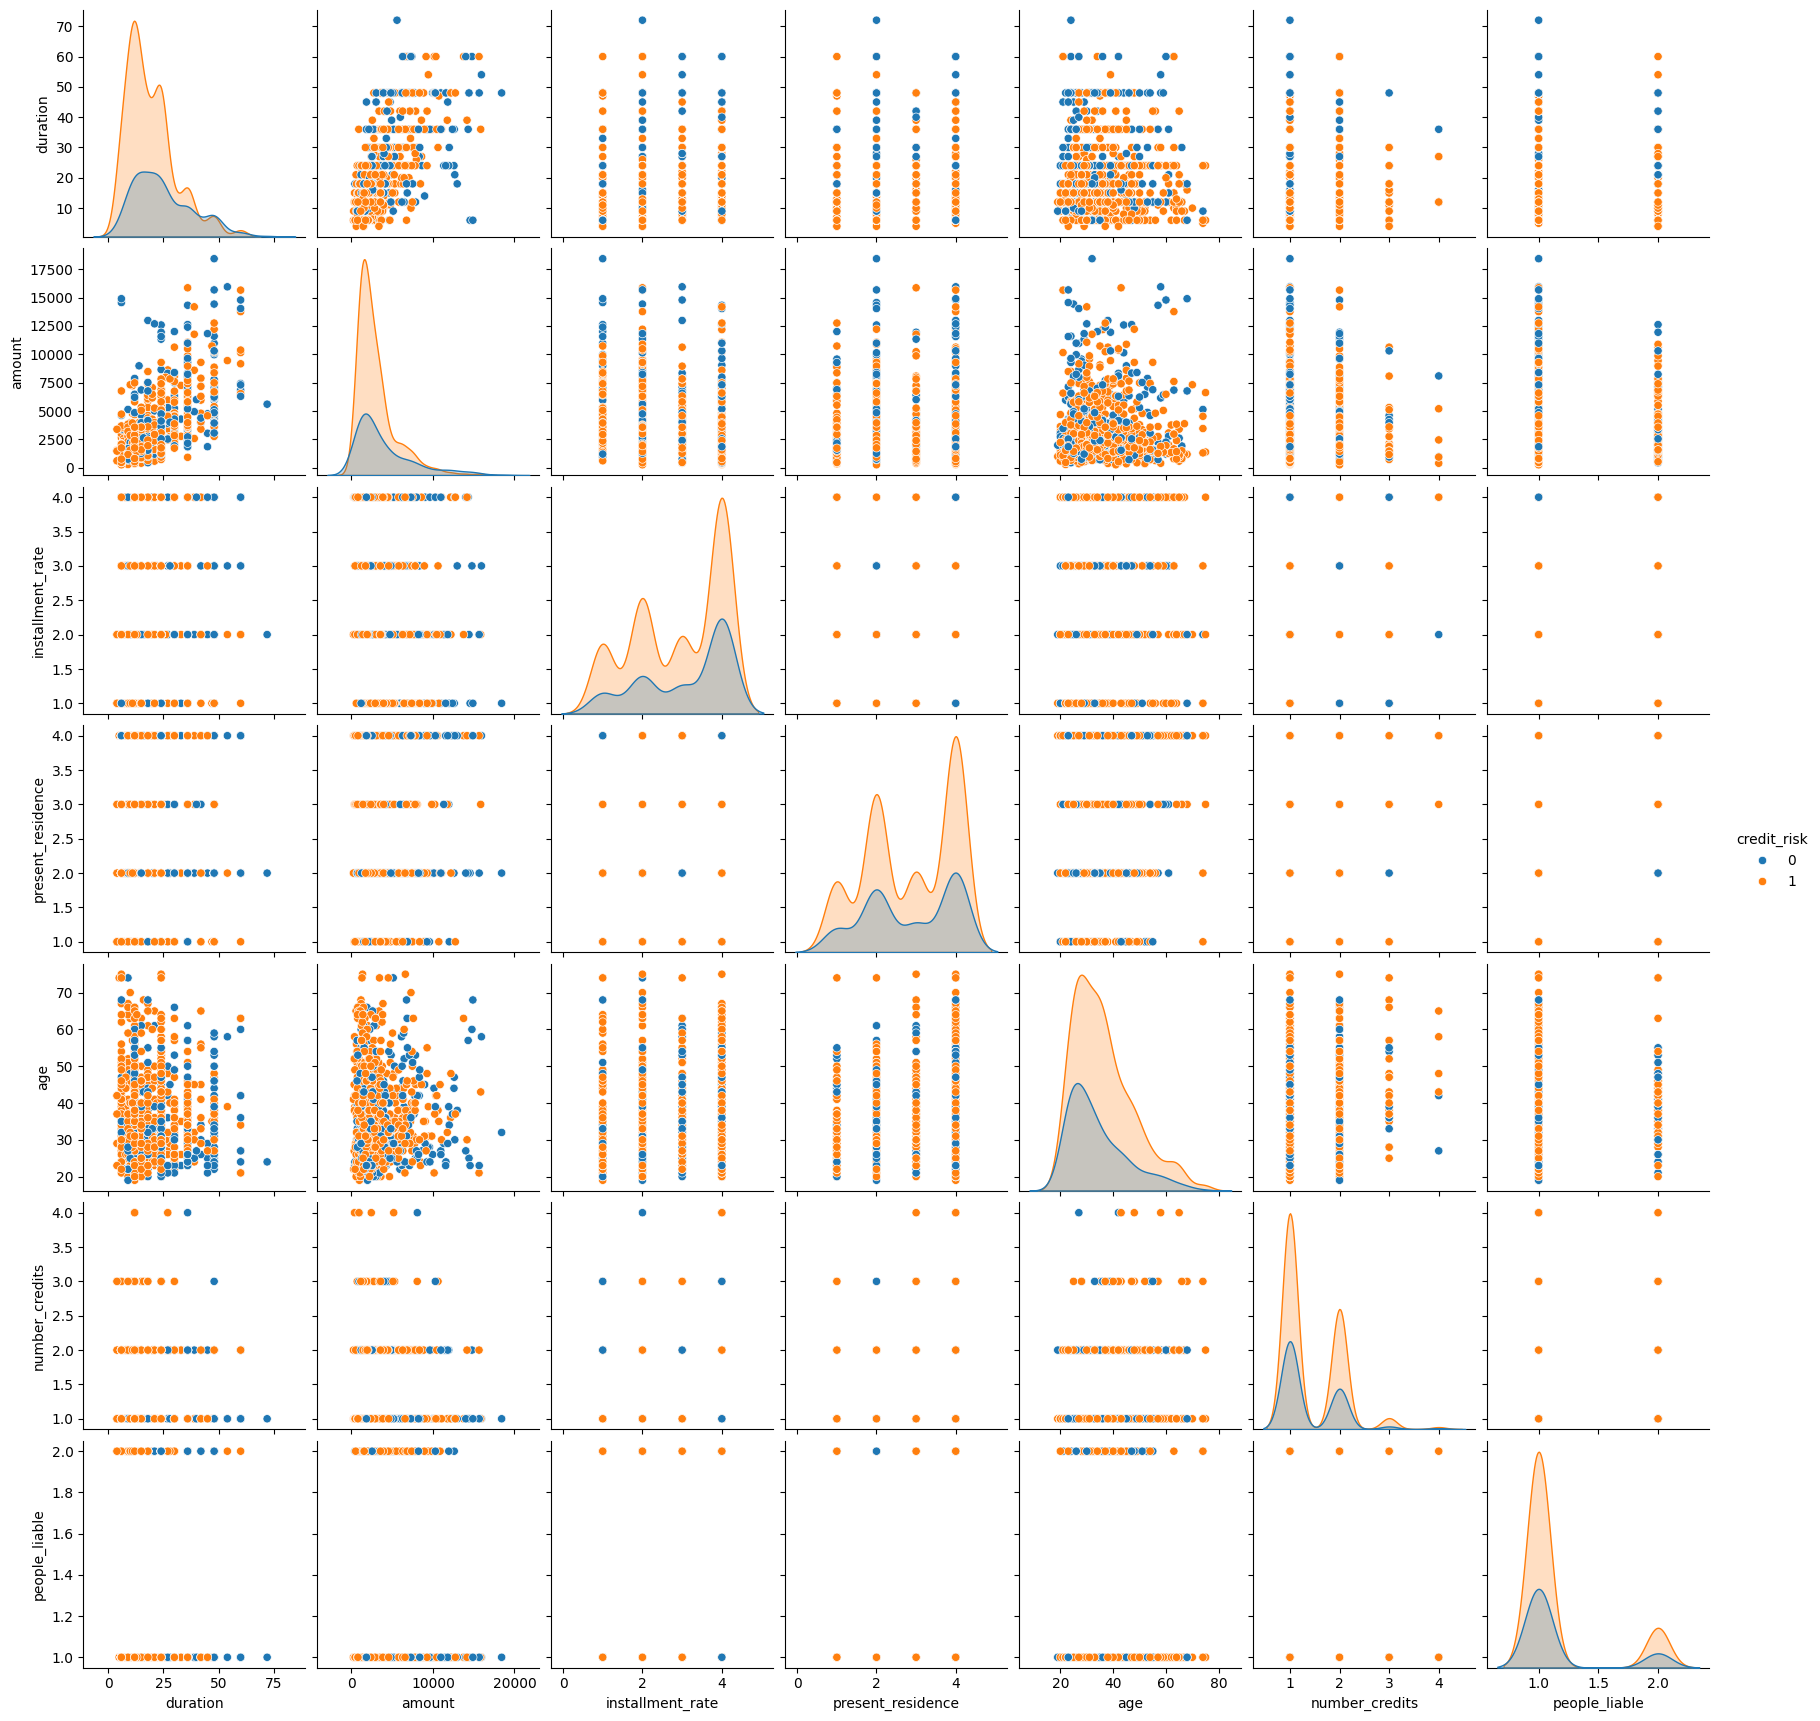

In [ ]:
# Pasangan plot untuk melihat hubungan antar variabel
sns.pairplot(df, hue='credit_risk')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [ ]:
data_x = df.drop(['status','credit_risk'], axis = 1)
data_y = df['credit_risk']

In [ ]:
data_x

,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee/official,1,yes,yes
1,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee/official,1,no,yes
2,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,no,yes
3,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes
4,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,no,yes
996,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,4,building society savings agreement/life insurance,40,none,own,1,management/self-employed/highly qualified empl...,1,yes,yes
997,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,... >= 7 years,4,male : single,none,4,car or other,38,none,own,1,skilled employee/official,1,no,yes
998,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,unknown/no property,23,none,for free,1,skilled employee/official,1,yes,yes


In [ ]:
# Normalize categorical columns
categorical_cols = data_x.select_dtypes(include=['object']).columns
data_x[categorical_cols] = data_x[categorical_cols].apply(lambda x: pd.factorize(x)[0])

In [ ]:
data_x

,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,-1.235859,0,0,-0.744759,0,0,0.918018,0,0,1.046463,0,2.765073,0,0,1.026565,0,-0.428075,0,0
1,2.247070,1,0,0.949342,1,1,-0.869748,1,0,-0.765594,0,-1.190808,0,0,-0.704573,0,-0.428075,1,0
2,-0.738298,0,1,-0.416354,1,2,-0.869748,0,0,0.140434,0,1.182721,0,0,-0.704573,1,2.333701,1,0
3,1.749509,1,2,1.633430,1,2,-0.869748,0,1,1.046463,1,0.831087,0,1,-0.704573,0,2.333701,1,0
4,0.256825,2,3,0.566380,1,1,0.024135,0,0,1.046463,2,1.534354,0,1,1.026565,0,2.333701,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738298,1,2,-0.543890,1,2,0.024135,1,0,1.046463,0,-0.399632,0,0,-0.704573,1,-0.428075,1,0
996,0.754386,1,4,0.207509,1,1,0.918018,2,0,1.046463,1,0.391544,0,0,-0.704573,2,-0.428075,0,0
997,-0.738298,1,0,-0.874066,1,0,0.918018,0,0,1.046463,3,0.215727,0,0,-0.704573,0,-0.428075,1,0
998,1.998289,1,0,-0.505275,1,1,0.918018,0,0,1.046463,2,-1.102900,0,1,-0.704573,0,-0.428075,0,0


In [ ]:
# Normalize numerical columns
numerical_cols = data_x.select_dtypes(include=['int64', 'float64']).columns
data_x[numerical_cols] = (data_x[numerical_cols] - data_x[numerical_cols].mean()) / data_x[numerical_cols].std()

In [ ]:
data_x.head()

,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,-1.235859,critical account/other credits existing,domestic appliances,-0.744759,unknown/no savings account,... >= 7 years,0.918018,male : single,none,1.046463,real estate,2.765073,none,own,1.026565,skilled employee/official,-0.428075,yes,yes
1,2.247070,existing credits paid back duly till now,domestic appliances,0.949342,... < 100 DM,1 <= ... < 4 years,-0.869748,female : divorced/separated/married,none,-0.765594,real estate,-1.190808,none,own,-0.704573,skilled employee/official,-0.428075,no,yes
2,-0.738298,critical account/other credits existing,retraining,-0.416354,... < 100 DM,4 <= ... < 7 years,-0.869748,male : single,none,0.140434,real estate,1.182721,none,own,-0.704573,unskilled - resident,2.333701,no,yes
3,1.749509,existing credits paid back duly till now,radio/television,1.633430,... < 100 DM,4 <= ... < 7 years,-0.869748,male : single,guarantor,1.046463,building society savings agreement/life insurance,0.831087,none,for free,-0.704573,skilled employee/official,2.333701,no,yes
4,0.256825,delay in paying off in the past,car (new),0.566380,... < 100 DM,1 <= ... < 4 years,0.024135,male : single,none,1.046463,unknown/no property,1.534354,none,for free,1.026565,skilled employee/official,2.333701,no,yes


In [ ]:
data_x

,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,-1.235859,0,0,-0.744759,0,0,0.918018,0,0,1.046463,0,2.765073,0,0,1.026565,0,-0.428075,0,0
1,2.247070,1,0,0.949342,1,1,-0.869748,1,0,-0.765594,0,-1.190808,0,0,-0.704573,0,-0.428075,1,0
2,-0.738298,0,1,-0.416354,1,2,-0.869748,0,0,0.140434,0,1.182721,0,0,-0.704573,1,2.333701,1,0
3,1.749509,1,2,1.633430,1,2,-0.869748,0,1,1.046463,1,0.831087,0,1,-0.704573,0,2.333701,1,0
4,0.256825,2,3,0.566380,1,1,0.024135,0,0,1.046463,2,1.534354,0,1,1.026565,0,2.333701,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738298,1,2,-0.543890,1,2,0.024135,1,0,1.046463,0,-0.399632,0,0,-0.704573,1,-0.428075,1,0
996,0.754386,1,4,0.207509,1,1,0.918018,2,0,1.046463,1,0.391544,0,0,-0.704573,2,-0.428075,0,0
997,-0.738298,1,0,-0.874066,1,0,0.918018,0,0,1.046463,3,0.215727,0,0,-0.704573,0,-0.428075,1,0
998,1.998289,1,0,-0.505275,1,1,0.918018,0,0,1.046463,2,-1.102900,0,1,-0.704573,0,-0.428075,0,0


from matplotlib import pyplot as plt
data_x['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_x['credit_history'].plot(kind='hist', bins=20, title='credit_history')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_x['purpose'].plot(kind='hist', bins=20, title='purpose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_x['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_x.plot(kind='scatter', x='duration', y='credit_history', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_x.plot(kind='scatter', x='credit_history', y='purpose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_x.plot(kind='scatter', x='purpose', y='amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_x.plot(kind='scatter', x='amount', y='savings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_x['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_x['credit_history'].plot(kind='line', figsize=(8, 4), title='credit_history')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_x['purpose'].plot(kind='line', figsize=(8, 4), title='purpose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_x['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

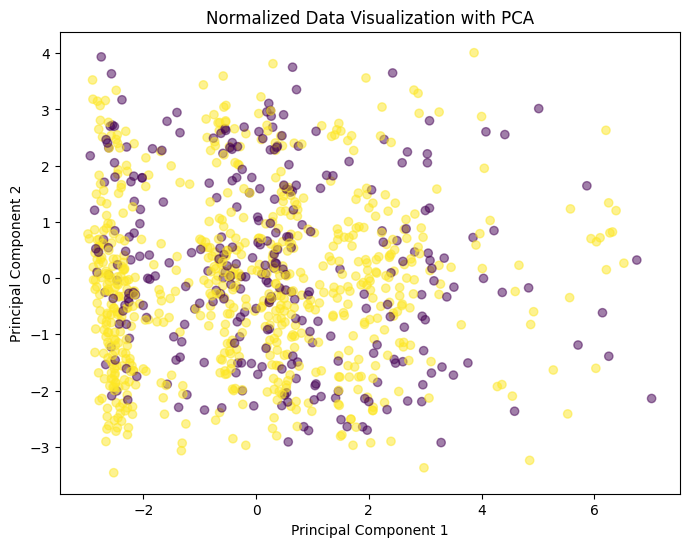

In [ ]:
# Create a PCA object
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization

# Fit and transform the data
X_pca = pca.fit_transform(data_x)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c=data_y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Normalized Data Visualization with PCA')
plt.show()

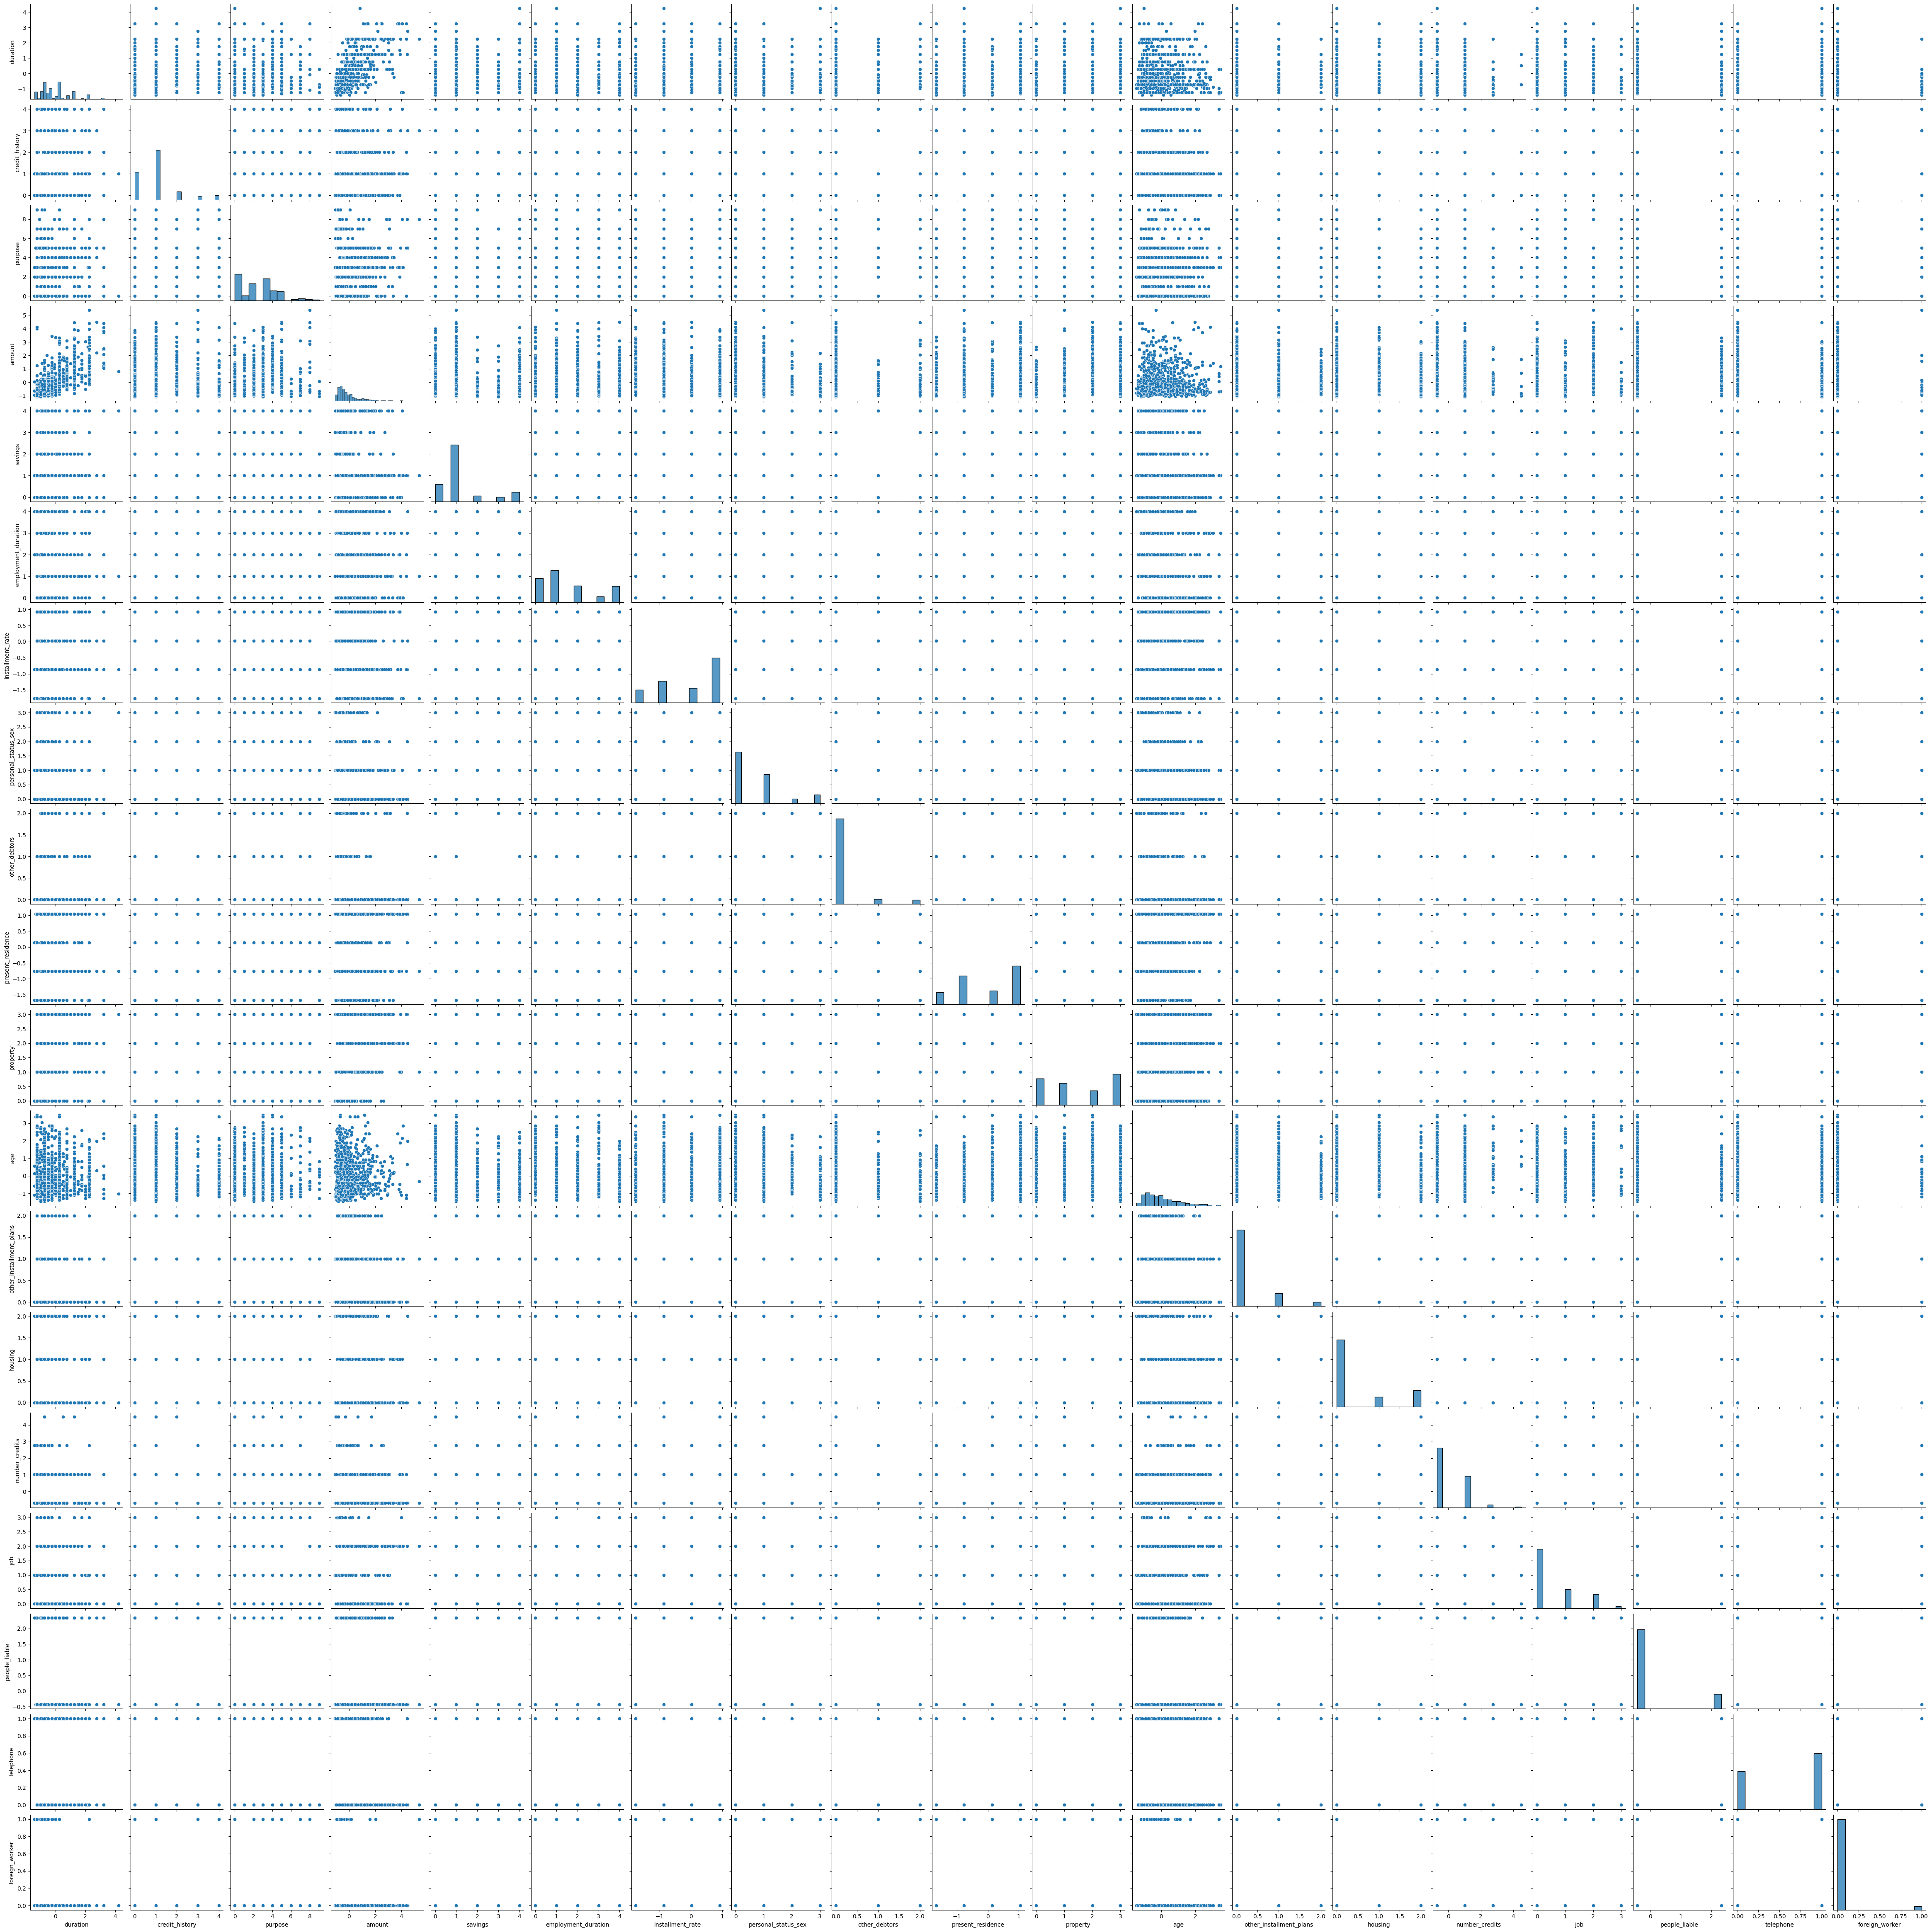

In [ ]:
# Pasangan plot untuk melihat hubungan antar variabel
sns.pairplot(data_x)
plt.show()